<a href="https://colab.research.google.com/github/NguyenThuan-data/News_Detection/blob/main/Dataset_Fake_and_Real_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libs
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import re
import string
import nltk
from nltk.corpus import stopwords

## **Data Exploration**

In [ ]:
# read data
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/COMP723 notebook/ASSIGNMENT/Fake and Real News.zip')
df_fake = pd.read_csv(zf.open('Fake.csv'))
df_true = pd.read_csv(zf.open('True.csv'))

In [ ]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
print("Subject counts for fake news:")
display(df_fake['subject'].value_counts())
print("\nSubject counts for true news:")
display(df_true['subject'].value_counts())

Subject counts for fake news:


,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778



Subject counts for true news:


,count
subject,
politicsNews,11272
worldnews,10145


In [ ]:
# merge datasets

## label data (fake = 0, real = 1)
df_fake['label'] = 0
df_true['label'] = 1

## combine data
df = pd.concat([df_fake, df_true])

## display data
df.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# Data shape
df.shape

(44898, 5)

In [ ]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
df.describe(include=['object','int64']).transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,44898,38729,Factbox: Trump fills top jobs for his administ...,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,44898,38646,,627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subject,44898,8,politicsNews,11272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,44898,2397,"December 20, 2017",182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,44898.0,NaN,NaN,NaN,0.477015,0.499477,0.0,0.0,0.0,1.0,1.0


In [ ]:
# check duplicates
df[df.duplicated(keep=False)]

,title,text,subject,date,label
9941,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",0
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",0
11445,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",0
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",0
14924,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",0
...,...,...,...,...,...
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",1
21345,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",1
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


- dataframe has 44898 rows and 5 columns
- change **'date'** from object type to datetime type
- No missing value
- There are 405 rows duplicated, the treatment will be dropping those duplicates to maintain data accuracy and integrity, as they can introduce inaccuracies and redundant data extraction and analysis efforts.

### **Data Cleaning and Preprocessing**

In [ ]:
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Display the info to confirm the data type change
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     11868 non-null  datetime64[ns]
 4   label    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.1+ MB


None

In [ ]:
# Dropping duplicated
df.drop_duplicates(inplace=True)
# check if still contains duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return text

# Apply the cleaning function to the 'text' and 'title' columns
df['text'] = df['text'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

# Display the first few rows to see the cleaned data
print("DataFrame after cleaning text and title columns:")
display(df.head())

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2871877809.py:14: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)


DataFrame after cleaning text and title columns:


,title,text,subject,date,label
0,donald trump sends out embarrassing new years ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,2017-12-31,0
2,sheriff david clarke becomes an internet joke ...,on friday it was revealed that former milwauke...,News,2017-12-30,0
3,trump is so obsessed he even has obamas name c...,on christmas day donald trump announced that h...,News,2017-12-29,0
4,pope francis just called out donald trump duri...,pope francis used his annual christmas day mes...,News,2017-12-25,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# We can keep stop_words='english' here as an alternative way to remove stop words
# min_df: ignore terms that appear in less than 5 documents(rows)
# max_df: ignore terms that appear in more than 95% of the documents(rows)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Get the feature names (words)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF matrix shape:", tfidf_matrix.shape)
print("Number of features (unique words):", len(tfidf_feature_names))

TF-IDF matrix shape: (44685, 44612)
Number of features (unique words): 44612


In [ ]:
# Display the TF-IDF matrix for the first 5 documents and the first 100 features
# Convert a small portion to a dense array for display
import numpy as np

num_docs_to_show = 5
num_features_to_show = 100

# Get the matrix slice and convert to dense
tfidf_dense_subset = tfidf_matrix[:num_docs_to_show, :num_features_to_show].todense()

# Get the corresponding feature names
subset_feature_names = tfidf_feature_names[:num_features_to_show]

# Create a DataFrame for better visualization
tfidf_df_subset = pd.DataFrame(tfidf_dense_subset, columns=subset_feature_names)

print(f"TF-IDF matrix subset (first {num_docs_to_show} documents and first {num_features_to_show} features):")
display(tfidf_df_subset)

TF-IDF matrix subset (first 5 documents and first 100 features):


,aa,aaa,aalo,aamer,aapl,aaplo,aaron,aaronson,aarp,ab,...,abes,abetted,abetting,abfalecbaldwin,abfoundation,abhor,abhorrent,abi,abia,abid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.047696,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Above is subset of the matrix of TF-IDF score, and 'aaron' is the only work that occur in the first 5 documents. Its score is 0.047696, this score suggests that the word "aaron" is somewhat relevant to the content of the third news article, but it might not be the most defining word in that document

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and labels (y)
X = tfidf_matrix
y = df['label']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (35748, 44612)
Shape of X_test: (8937, 44612)
Shape of y_train: (35748,)
Shape of y_test: (8937,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Multinomial Naive Bayes model
# alpha is a smoothing parameter (0 for no smoothing)
naive_bayes_model = MultinomialNB(alpha=0.1)

# Train the model using the training data
naive_bayes_model.fit(X_train, y_train)

print("Naive Bayes model trained successfully.")

Naive Bayes model trained successfully.


Naive Bayes Model Evaluation:
Accuracy: 0.9538995188542017

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      4738
           1       0.95      0.95      0.95      4199

    accuracy                           0.95      8937
   macro avg       0.95      0.95      0.95      8937
weighted avg       0.95      0.95      0.95      8937



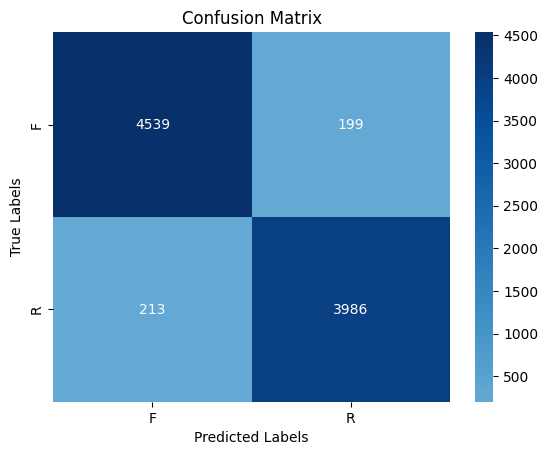

In [ ]:
# Make predictions on the testing data
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Naive Bayes Model Evaluation:")
print("Accuracy:", accuracy_nb)
print("\nClassification Report:\n", report_nb)


# display confusion matrix
target_names = ['F','R']
sns.heatmap(confusion_matrix_nb,annot=True,fmt='g',center = True,cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential([
    # Input layer with the same number of neurons as the number of TF-IDF features
    # Using a Dense layer with ReLU activation
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout layer to help prevent overfitting
    Dropout(0.5),
    # Another Dense layer
    Dense(64, activation='relu'),
    # Dropout layer
    Dropout(0.5),
    # Output layer with 1 neuron for binary classification (fake or true)
    # Using sigmoid activation to output a probability between 0 and 1
    Dense(1, activation='sigmoid')
])

# Compile the model
# Using Adam optimizer and binary crossentropy loss for binary classification
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
# Using a validation split to monitor performance on unseen data during training
history = model.fit(X_train, y_train,
                    epochs=4, # Number of training epochs
                    batch_size=32, # Number of samples per gradient update
                    validation_split=0.2, # Use 20% of training data for validation
                    verbose=1) # Display training progress

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     5,710,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,718,785 (21.82 MB)

 Trainable params: 5,718,785 (21.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
894/894 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.9402 - loss: 0.2074 - val_accuracy: 0.9933 - val_loss: 0.0215
Epoch 2/4
894/894 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9981 - loss: 0.0079 - val_accuracy: 0.9940 - val_loss: 0.0211
Epoch 3/4
894/894 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9943 - val_loss: 0.0229
Epoch 4/4
894/894 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9936 - val_loss: 0.0252
